<a href="https://colab.research.google.com/github/Santigs/AI/blob/master/Deeplizard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning exercise from DeepLizard [Videocourse](https://www.youtube.com/watch?v=UkzhouEk6uY&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=3)

---






### Creating a random set of sample data

In [0]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [0]:
train_labels = []
train_samples = []

In [0]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)




In [0]:
for i in train_samples:
  print(i)
  

In [0]:
for i in train_labels:
  print(i)

In [0]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [43]:
train_samples

array([ 59,  75,  31, ..., 100,  61,  66])

In [44]:
train_labels

array([1, 0, 1, ..., 1, 0, 1])

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))


In [46]:
scaled_train_samples

array([[0.52873563],
       [0.71264368],
       [0.20689655],
       ...,
       [1.        ],
       [0.55172414],
       [0.6091954 ]])

In [0]:
for i in scaled_train_samples:
  print(i)


### Defining the Model Neural Network Architecture

In [0]:
%tensorflow_version 1.x
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [0]:
model = Sequential([
                    Dense(16, input_shape=(1,), activation='relu' ),
                    Dense(32, activation='relu'),
                    Dense(2, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [0]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
# make sure the validation set (which is the % at the end of the sample set) is representative of the whole population
model.fit(scaled_train_samples, train_labels, validation_split=0.1   , batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.6934 - acc: 0.5688 - val_loss: 0.6688 - val_acc: 0.5762
Epoch 2/20
 - 0s - loss: 0.6536 - acc: 0.6090 - val_loss: 0.6296 - val_acc: 0.6667
Epoch 3/20
 - 0s - loss: 0.6197 - acc: 0.6852 - val_loss: 0.5917 - val_acc: 0.7524
Epoch 4/20
 - 0s - loss: 0.5882 - acc: 0.7307 - val_loss: 0.5573 - val_acc: 0.7952
Epoch 5/20
 - 0s - loss: 0.5582 - acc: 0.7741 - val_loss: 0.5231 - val_acc: 0.8286
Epoch 6/20
 - 0s - loss: 0.5289 - acc: 0.8026 - val_loss: 0.4899 - val_acc: 0.8524
Epoch 7/20
 - 0s - loss: 0.5004 - acc: 0.8344 - val_loss: 0.4567 - val_acc: 0.8762
Epoch 8/20
 - 0s - loss: 0.4732 - acc: 0.8476 - val_loss: 0.4255 - val_acc: 0.9095
Epoch 9/20
 - 0s - loss: 0.4480 - acc: 0.8603 - val_loss: 0.3968 - val_acc: 0.9190
Epoch 10/20
 - 0s - loss: 0.4251 - acc: 0.8794 - val_loss: 0.3695 - val_acc: 0.9286
Epoch 11/20
 - 0s - loss: 0.4046 - acc: 0.8841 - val_loss: 0.3452 - val_acc: 0.9286
Epoch 12/20
 - 0s - loss: 0.3864 - acc

### Preprocess Test data

In [0]:
test_labels = []
test_samples = []

In [0]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [0]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

### Predict

In [0]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [60]:
predictions

array([[0.5221015 , 0.47789845],
       [0.04295469, 0.95704526],
       [0.94246536, 0.05753459],
       [0.05008588, 0.9499141 ],
       [0.5903305 , 0.40966955],
       [0.12543945, 0.87456053],
       [0.91519904, 0.08480096],
       [0.06134874, 0.93865126],
       [0.91519904, 0.08480096],
       [0.05544875, 0.9445513 ],
       [0.94258916, 0.05741079],
       [0.09049767, 0.9095023 ],
       [0.82708263, 0.1729173 ],
       [0.05008588, 0.9499141 ],
       [0.9423414 , 0.05765864],
       [0.07713682, 0.9228631 ],
       [0.5678396 , 0.4321604 ],
       [0.4078206 , 0.5921795 ],
       [0.90832347, 0.09167654],
       [0.43028393, 0.5697161 ],
       [0.94367784, 0.05632218],
       [0.1718259 , 0.8281741 ],
       [0.8924949 , 0.10750502],
       [0.30270958, 0.6972904 ],
       [0.9435705 , 0.0564295 ],
       [0.06451436, 0.9354856 ],
       [0.9006894 , 0.09931056],
       [0.32253662, 0.6774634 ],
       [0.9435705 , 0.0564295 ],
       [0.36411208, 0.6358879 ],
       [0.

In [0]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)


In [59]:
rounded_predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

### Confusion Matrix

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt



In [0]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix, without normalization')


  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



Confusion Matrix, without normalization
[[190  20]
 [ 10 200]]


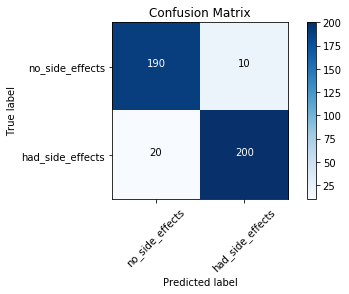

In [63]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels)